In [2]:
!pip install spacy
!pip install ginza ja-ginza

!pip install wordcloud

In [16]:
!pip install matplotlib

In [14]:
!apt -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 41 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 0s (34.2 MB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 121713 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipaf

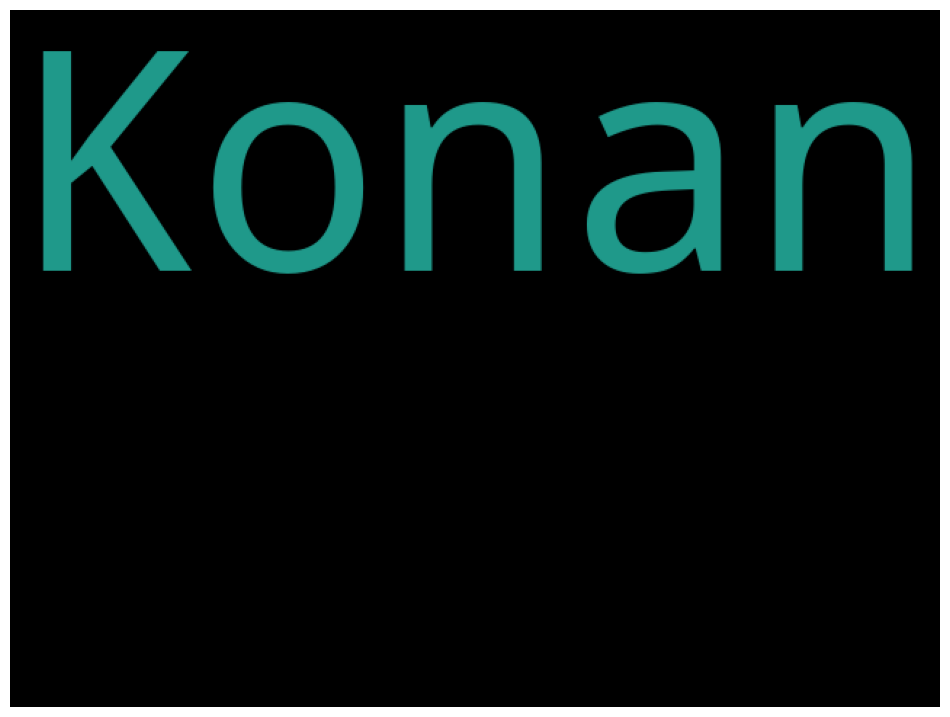

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = "Konan"
wc=WordCloud(width=640,height=480)
wc.generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

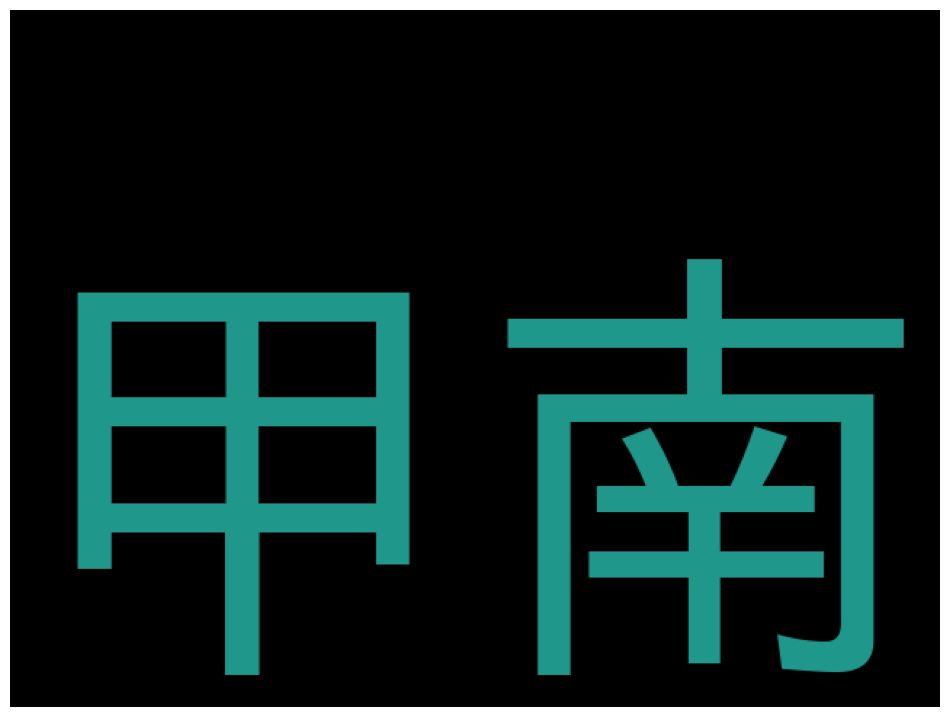

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = "甲南"
font_path_gothic = '/usr/share/fonts/opentype/ipafontgothic/ipagp.ttf'
wc=WordCloud(width=640,height=480, font_path=font_path_gothic)
wc.generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

甲南大学は、兵庫県神戸市東灘区岡本八丁目9番1号に本部を置く日本の私立大学である。
1951年に設置された。大学の略称は甲南、甲南大。 
西日本唯一の私立7年制旧制高等学校であった甲南高等学校を前身とする。
甲南大学は、1923年（大正12年）に第二次高等学校令に基づいて2番目に設立された私立旧制高等学校である旧制甲南高等学校を前身とする大学である。1910年（明治43年）の甲南学園の創立には、阪神間や住吉村在住の関西の政・財界人11名（田辺貞吉、才賀藤吉、弘世助太郎、平生釟三郎、生島永太郎、岸田杢、阿部元太郎、野口孫市、山口善三郎、中島保之助、小林山郷）が創立事務に当たった[1]。

建学の精神
甲南大学は、創立者である平生釟三郎が掲げた「人格の修養と健康の増進を重んじ、
個性を尊重して各人の天賦の特性を伸張させる」を教育理念としている。

スローガン
個性を力へ。 - 2009年の甲南学園創立90周年を機に制定された。
未来に伝える　明日につなぐ - 2011年の大学開設60周年記念のスローガン。

教育および研究
甲南大学はアクティブ・ラーニングを推進しており、
ゼミナールだけでなく通常の講義においても教員と学生の双方向的なコミュニケーションの成立を目指し、
学生の授業参加が深まるような学修環境の整備に取り組んでいる。
具体的には、講義1クラスの受講生が100名以内になることを最終的な目標として、段階的に少人数教育を進めるとしている。

甲南大学知能情報学部の特長は、学生との距離感を小さくするインタラクティブ教育を心がけていることである。
1年次から基礎ゼミという7,8人での少人数科目があり、2年次にも5人程度で協力してひとつの作品をつくりあげる
プロジェクト演習がある。
このように甲南大学知能情報学部では教員と学生や学生同士が相互に刺激しあう密度の高い学びを実現している。
甲南大学知能情報学部で学べる領域は、Webや人工知能、数学などと幅広く、拡大するIT社会においてリーダーシップを発揮できる人材を育成している。



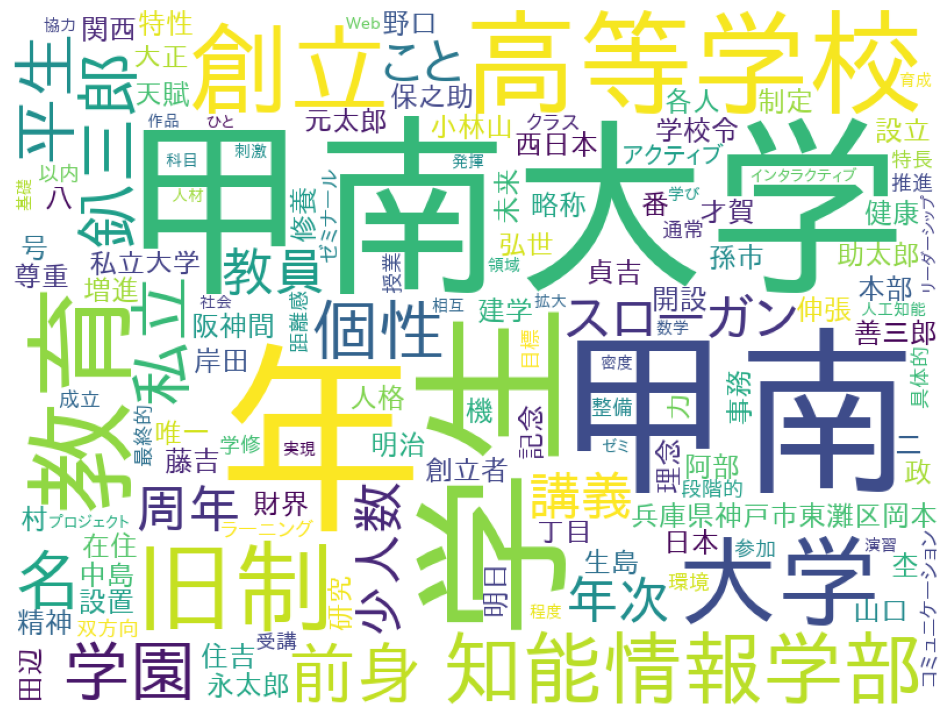

In [34]:

import spacy
import ginza
import pandas as pd
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nlp = spacy.load('ja_ginza')

# ファイルを開く
f1 = open('/content/drive/MyDrive/AI/konanutf8.txt','r')
test1 = f1.read()
# ファイルの中身をそのまま表示する
print(test1)
# 形態素解析を実行する

m = nlp(test1)
# result_list を空のリストとして初期化する
result_list = []
for sent in m.sents:
  for token in sent:
    output_string = f"{token.i} {token.orth_} {token.lemma_} {token.pos_} {token.tag_} {token.dep_} {token.head.i}¥n" # result_list に解析結果を追加する
    result_list.append([token.orth_, token.lemma_, token.pos_, token.tag_])

df = pd.DataFrame(result_list, columns = ['text', 'lemma', 'pos','tag'])
font_path_gothic = '/usr/share/fonts/opentype/ipafontgothic/ipagp.ttf'
all_text = ' '.join(df[df['tag'].str.startswith('名詞')]['text'].to_list())
result = WordCloud(width=800, height=600, background_color='white',
font_path=font_path_gothic).generate(all_text)
plt.figure(figsize=(12,10))
plt.imshow(result)
plt.axis('off')
plt.show()
f1.close()